In [1]:
%load_ext autoreload
%autoreload 2

import keras
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PIL

Using TensorFlow backend.


In [ ]:
# Load some models

In [3]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
xception = keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
resnet50 = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
mobilenet = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
mobilenet_v2 = keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
densenet = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [2]:
densenet32x32 = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32, 32, 3), pooling=None, classes=1000)
x = densenet32x32.get_layer(index=-1).output
top = keras.layers.Dense(1000, activation="softmax")(x)
densenet32x32_withtop = keras.models.Model(inputs=densenet32x32.inputs, outputs=top)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
nasnet = keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
K.clear_session()

In [ ]:
# downloading imagenet
# https://github.com/keras-team/keras/issues/6486

In [5]:
# Utility functions (may want to move to keras_utils.py)

from keras.preprocessing import image


def load_image(img, estimator=None):
    """
    Returns a single image as an array for an estimator's input
    img: one of: path to a single image file, PIL Image object, numpy array
    estimator: model instance, for resizing the image to the required input dimensions
    """
    # TODO: Take in PIL image object, or an array can also be multiple images.
    # "pipeline": path str -> PIL image -> numpy array
    xDims = None
    if estimator is not None:
        xDims = estimator.input_shape[1:3]
    im = image.load_img(img, target_size=xDims)
    x = image.img_to_array(im)

    # we need to insert an axis at the 0th position to indicate the batch size
    # this is required by the keras predict() function
    x = np.expand_dims(x, axis=0)
    return x


def applications_preprocessing(estimator, x):
    """
    Apply preprocess_input function in keras.applications for input
    x: image array,
    estimator: estimator instance, one from keras.applications
    """
    try:
        name = estimator.name.lower()
        f = getattr(keras.applications, name).preprocess_input
    except AttributeError:
        raise AttributeError('Could not get the preprocessing function')
    else:
        x = f(x)
        return x

    
# TODO: this will need to move to ipython.py
def show_prediction():
    raise NotImplementedError


def explain_images():
    # Take a directory of images and call explain_prediction_keras on each image
    raise NotImplementedError

def explain_layers():
    # Take a list of layers and call explain_prediction_keras on each layer
    raise NotImplementedError

In [6]:
import eli5
import os
import matplotlib.pyplot as plt

def show_dir(model, img_dir, *args, **kwargs):
    imgs = os.listdir(img_dir)
    for i, img in enumerate(imgs):
        I = show(model, os.path.join(img_dir, img), *args, **kwargs)

def show(model, doc, *args, preprocess=False, preprocess_fn=None, **kwargs):
    if preprocess:
        doc = load_image(doc, model)
        if preprocess_fn:
            doc = preprocess_fn(doc)
    E = eli5.explain_prediction(model, doc, *args, **kwargs)
    I = eli5.formatters.image.format_as_image(E)
    return I

In [ ]:

if decoder is not None:
        # TODO: check if decoder is callable?
        # FIXME: it is not certain that we need such indexing into the decoder's output
        top_1 = decoder(predictions)[0][0] 
        ncode, label, proba = top_1
        # TODO: do I print, log, or append to 'description' this output?
        print('Predicted class:')
        print('%s (%s) with probability %.2f' % (label, ncode, proba))


In [3]:
import eli5

img = 'examples/cat_dog.jpg'
img2 = 'examples/170997360_8193925eef.jpg'

cat_cls = [282]
window_cls = [904]
snake_cls = [59]

# show(vgg16, img, layers="block5_conv3", preprocessing=keras.applications.vgg16.preprocess_input)


# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[282], target_decoder=keras.applications.xception.decode_predictions) # 'tiger cat'
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[904], target_decoder=keras.applications.xception.decode_predictions) # 'window screen'
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[59], target_decoder=keras.applications.xception.decode_predictions) # 'vine snake'
# show_dir(xception, 'examples/', layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input)

# show(resnet50, img, preprocessing=keras.applications.resnet50.preprocess_input, layer=-3)


# mobilenet.summary()
# show(mobilenet, img, preprocessing=keras.applications.mobilenet.preprocess_input, layer=-3)
# -7 -> works
# -6 -> too many indices
# -5 downwards (even conv_preds) -> all red
# show(mobilenet, img, preprocess=True, layer=-8)


# from keras.datasets import cifar10
# import numpy as np
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# # print(x_test.shape)
# x = x_test[1]
# x = np.expand_dims(x, axis=0)
# densenet32x32_withtop.summary()
# show(densenet32x32_withtop, x, preprocess=False, layer="conv1/conv")
# show(densenet32x32_withtop, x, preprocess=False, prediction_decoder=keras.applications.densenet.decode_predictions, layer=-10)
# -> ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1, 1, 1000)


# TESTMODELS = [
# #     (xception, keras.applications.xception.preprocess_input, "block14_sepconv2_act"),
#     (resnet50, keras.applications.resnet50.preprocess_input),
#     (mobilenet, keras.applications.mobilenet.preprocess_input),
#     (densenet, keras.applications.densenet.preprocess_input),
#     (nasnet, keras.applications.nasnet.preprocess_input),
# ]
# for model, preprocess_fn in TESTMODELS:
#     print(model.name)
#     show_dir(model, 'examples', layers="block14_sepconv2_act", preprocessing=preprocess_fn)
#     print('='*50, end='\n\n\n')


# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(resnet50, 'examples/cat_dog.jpg', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)


# def f(x):
#     return x*0
# show(nasnet, img, preprocess=True, prediction_decoder=keras.applications.nasnet.decode_predictions)
# nasnet.summary()
# print(len(nasnet.layers))
# for l in [-405, -205, -5]:
#     show(nasnet, img, preprocess=True, layer=l, targets=[282])

# mobilenet gives all red?
# mobilenet.summary()
# show(mobilenet, img, preprocess=True, preprocess_fn=keras.applications.mobilenet.preprocess_input)

# mobilenet v2 works


# mobilenet_v2.summary()
# p = mobilenet_v2.predict(doc)
# print(p)

# show(densenet, img, preprocess=True, preprocess_fn=keras.applications.densenet.preprocess_input)
# show(densenet, img, preprocess=True, preprocess_fn=keras.applications.densenet.preprocess_input, targets=cat_cls)

In [74]:
# remove softmax

doc = load_image(img, mobilenet_v2)
doc = keras.applications.mobilenet_v2.preprocess_input(doc)

l = mobilenet_v2.get_layer(index=-1)
l.activation = keras.activations.linear

# presoft = l
# model = keras.models.Model(inputs=mobilenet_v2.input, outputs=presoft.output)

# https://stackoverflow.com/questions/43030721/cant-change-activations-in-existing-keras-model
mobilenet_v2.save('tmp_model_save')
mobilenet_v2 = keras.models.load_model('tmp_model_save')

/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [42]:
# integration test example

import eli5

mobilenet_v2 = keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
E = eli5.explain_prediction(mobilenet_v2, doc)
print(E)

AttributeError: 'numpy.dtype' object has no attribute 'base_dtype'

In [9]:
import sys
sys.path.insert(0, 'eli5/')
print(sys.path)



['eli5/', '.', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python37.zip', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/lib-dynload', '/usr/lib/python3.7', '', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/site-packages', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/site-packages/scikit_image-0.15.0-py3.7-linux-x86_64.egg', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/site-packages/networkx-2.3-py3.7.egg', '/media/tomas/Data/Development/gsoc19_scrapinghub_eli5/envs/eli5_venv_py3.7.3_tf1.13/lib/python3.7/site-packages/imageio-2.5.0-py3.7.egg', '/media/tomas/Data/Development/gso

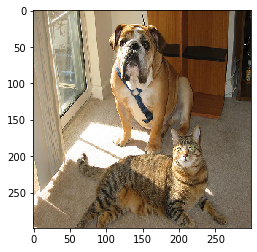

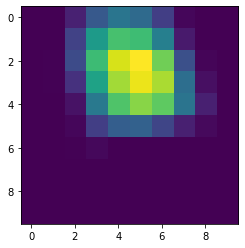

In [7]:
import eli5
import matplotlib.pyplot as plt

doc = eli5.keras.image_from_path('../eli5_examples/cat_dog.jpg', (299, 299))
doc = keras.applications.xception.preprocess_input(doc)

expl = eli5.explain_prediction(xception, doc)
plt.imshow(expl.image); plt.show()
plt.imshow(expl.heatmap); plt.show()

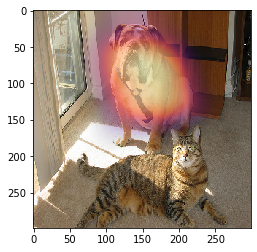

In [8]:
heatmap = eli5.format_as_image(expl)
plt.imshow(hebatmap); plt.show()

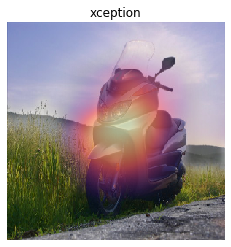

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4376820c88>)

In [10]:
doc = eli5.keras.image_from_path('../eli5_examples/motorcycle.jpg', (299, 299))
doc = keras.applications.xception.preprocess_input(doc)

scooter_id = 670
eli5.show_prediction(xception, doc, targets=[scooter_id])

In [2]:
import eli5

img = 'examples/cat_dog.jpg'
I = eli5.keras.image_from_path(img, image_shape=(55, 55))
print(I.shape)

(1, 55, 55, 3)


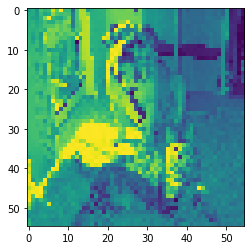

In [19]:
I = eli5.keras.image_from_path(img, image_shape=(55, 55))

I = I[0,...,0]
plt.imshow(I)
plt.show()

import scipy
# I = scipy.misc.imresize(I, (30, 50))
# I = scipy.ndimage.zoom(I, (0.5, 0.5))
# print(I.shape)
# plt.imshow(I)
# plt.show()


In [28]:
import eli5
# eli5.format_as_image()
eli5.format_as_image('a')

AttributeError: 'str' object has no attribute 'image'

In [45]:
from eli5 import keras as eli5keras

img = 'examples/cat_dog.jpg'
doc = eli5keras.image_from_path(img, image_shape=(224, 224))
doc = keras.applications.mobilenet_v2.preprocess_input(doc)

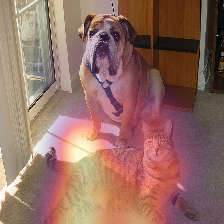

In [84]:
show(mobilenet_v2, doc, layer=None, targets=cat_cls)

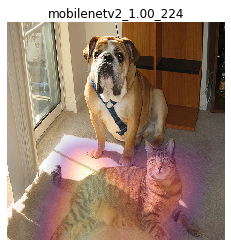

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe4cf5fa90>)

In [16]:
eli5.show_prediction(mobilenet_v2, doc, alpha_limit=100, targets=[282])

In [46]:
E = eli5.explain_prediction(mobilenet_v2, doc)

Instructions for updating:
Use tf.cast instead.


In [49]:
eli5.format_as_dict(E)

{'estimator': 'mobilenetv2_1.00_224',
 'description': 'Grad-CAM visualization for image input; output is images',
 'error': '',
 'method': 'Vanilla Grad-CAM',
 'is_regression': False,
 'targets': None,
 'feature_importances': None,
 'decision_tree': None,
 'highlight_spaces': None,
 'transition_features': None,
 'image': <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7677A3B048>,
 'heatmap': <PIL.Image.Image image mode=L size=7x7 at 0x7F7677A3B2B0>}

In [88]:
mobilenet_v2.summary()
# required_rank = len(mobilenet_v2.input_shape)
# print(required_rank)
# for i in range(len(mobilenet_v2.layers)-1, 0, -1):
#     l = mobilenet_v2.get_layer(index=i)
#     rank = len(l.output_shape)
#     kind = type(l)
#     name = l.name
#     print(l, rank, kind, name)
l1 = mobilenet_v2.get_layer(index=-3)
l2 = mobilenet_v2.get_layer(index=-4)
l3 = mobilenet_v2.get_layer(name='out_relu')
print(l1)
print(l2)
print(l3)
print(l1 == l3)
print(l1 is l3)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [119]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation, GlobalAveragePooling2D

m = keras.models.Sequential()
m.add(Activation('linear', input_shape=(32, 32, 1))) # input
m.add(Conv2D(10, (3, 3))) # conv
m.add(Conv2D(20, (3, 3))) # conv2
m.add(GlobalAveragePooling2D()) # gap
# might want to test that go from behind as well (too complex?)

for i, layer in enumerate(m.layers):
    layer.name = 'test%d' % i
    
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
test0 (Activation)           (None, 32, 32, 1)         0         
_________________________________________________________________
test1 (Conv2D)               (None, 30, 30, 10)        100       
_________________________________________________________________
test2 (Conv2D)               (None, 28, 28, 20)        1820      
_________________________________________________________________
test3 (GlobalAveragePooling2 (None, 20)                0         
Total params: 1,920
Trainable params: 1,920
Non-trainable params: 0
_________________________________________________________________


In [114]:
l = eli5.keras.get_activation_layer(m, 'test')
print(l.name)
print(eli5.keras.get_activation_layer(m, -2))
print(eli5.keras.get_activation_layer(m, m.get_layer(index=0)))
try:
    eli5.keras.get_activation_layer(m, 2.5)
except ValueError:
    print('success')
print(eli5.keras.get_activation_layer(m, None))

ValueError: No such layer: test

In [ ]:
show(mobilenet_v2, img, preprocess=True, preprocess_fn=keras.applications.mobilenet_v2.preprocess_input)

In [ ]:
# TUTORIAL IDEAS
# TODO: grad-cam on multiple layers by passing a list of layers
# explain_prediction args:
#        targets: integer for ImageNet classification


In [ ]:
# MANUAL TESTS
## test explain_prediction pre-trained model


## test explain_prediction custom model
## test explain_prediction different number of classes
# manual test: might want to train an keras.applications imagenet model on less than or more than 1000 classes
# https://stackoverflow.com/questions/54156128/keras-transfer-learning-on-more-than-1000-classes


## test different image formats: png, jpg, etc

1.0 50.019451530612244
11368 2509776
25097.76
0.45294878905527824


AssertionError: 

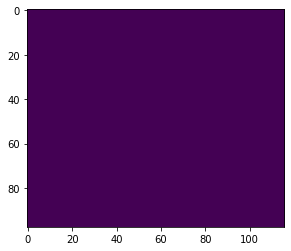

In [55]:
H = E.heatmap
H = H.resize((E.image.width, E.image.height), resample=PIL.Image.LANCZOS)
H = np.array(H)
p1, p2, p3, p4 = (54, 2), (170, 2), (54, 100), (170, 100)
# [row:column] = [y:x]
S = H[2:100, 54:170]
S = np.ones_like(S)
print(np.mean(S), np.mean(H))
plt.imshow(S)
total = np.sum(H)
target = np.sum(S)
print(target, total)
p = total/100
print(p)
activation = target/p
print(activation)
assert 70 < activation

In [ ]:
import tensorflow as tf

a = np.array([[5, 3]])
with tf.Session().as_default():
    b = K.one_hot([3], 5).eval()
    print(b)

In [29]:
# Custom model

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(24,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

print(model.summary())
x = np.ones((1, 24))

import eli5
eli5.explain_prediction(model, x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                800       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________
None
dispatched


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 166s 1us/step


In [3]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 146s 1us/step


In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step
